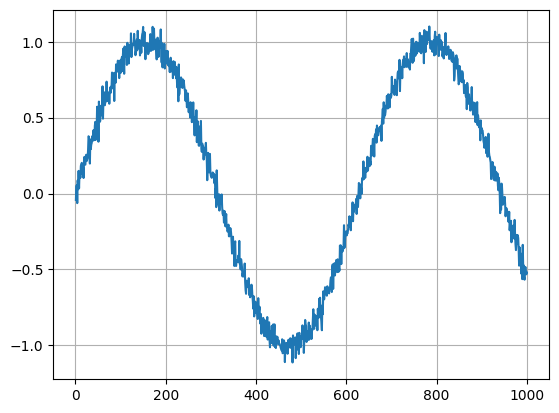

In [60]:
import torch 
from torch import nn
import matplotlib.pyplot as plt

T=1000
time=torch.arange(1,T+1,dtype=torch.float32)
x=torch.sin(0.01*time)+torch.normal(0,0.05,(T,))
plt.plot(time,x)
plt.grid()
plt.show()


In [61]:
from torch.utils import data

tan=4
feathures=torch.zeros((T-tan,tan))
for i in range(tan):
    feathures[:,i]=x[i:T-tan+i]
labels=x[tan:].reshape(-1,1)

batch_size=16
n_train=600
dataset=data.TensorDataset(feathures[:n_train],labels[:n_train])
train_iter=data.DataLoader(dataset,batch_size,True)

In [62]:
from torch import nn

lr=0.03
epoch_num=6

def init_module(m):
    if type(m)==nn.Linear:
        nn.init.xavier_uniform_(m.weight)
        nn.init.zeros_(m.bias)

net=nn.Sequential(nn.Linear(4,10),nn.ReLU(),nn.Linear(10,1))
net.apply(init_module)

trainer=torch.optim.Adam(net.parameters(),lr)

loss=nn.MSELoss(reduction="none")

for i in range(epoch_num):
    for x,y in train_iter:
        trainer.zero_grad()
        y_hat=net(x)
        l=loss(y_hat,y)
        l.sum().backward()
        trainer.step()
    with torch.no_grad():
        print(f'i:{i} loss:{loss(net(feathures),labels.reshape(-1,1)).sum()}')


i:0 loss:14.138359069824219
i:1 loss:4.379439830780029
i:2 loss:5.402376174926758
i:3 loss:3.7239646911621094
i:4 loss:3.7834200859069824
i:5 loss:4.534015655517578


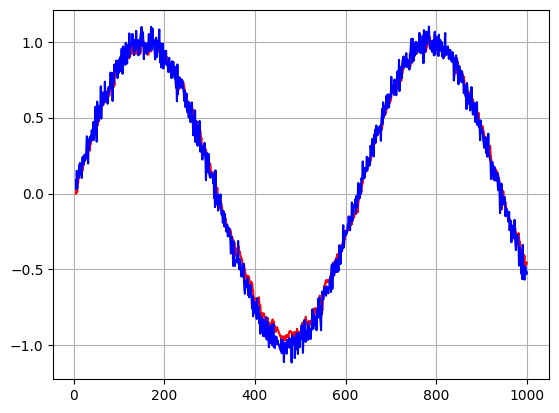

In [63]:
y_hat=net(feathures).reshape((-1,))
plt.plot(time[tan:].detach().numpy(),y_hat.detach().numpy(),'r')
plt.plot(time[tan:].detach().numpy(),labels.detach().numpy(),'b')
plt.grid()
plt.show()